In [1]:
import pandas as pd
import numpy as nm

import string
import unidecode
import re

import gensim.downloader

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from gensim.models import Word2Vec

In [2]:
!pip install unidecode
!pip install --upgrade gensim

# Functions for DataFrame manipulation

## def clean()

In [3]:
"""Cleaning the DataFrame"""

def clean(text):
    
    text_urless=re.sub(r"(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*", '', text)
    
    for punctuation in string.punctuation:
        text = text_urless.replace(punctuation, ' ') # Remove Punctuation
        
    lowercased = text.lower() # Lower Case
    
    unaccented_string = unidecode.unidecode(lowercased) # remove accents
          
    tokenized = word_tokenize(unaccented_string) # Tokenize
    
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    
    stop_words = set(stopwords.words('english')) # Make stopword list
    
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    
    return without_stopwords #" ".join(without_stopwords)

## def masc_similar_words()

In [4]:
"""Masculine word finder from text (Word2vec trained on job descriptions)"""

def masc_similar_words(text):
    simil_masc_vocab = []
    match_masc_vocab = []

    n_simil_masc = 0
    n_match_masc = 0

    for word in text:
        for masc_word in masc_vocab:
            if masc_word in word2vec_description.wv.key_to_index:
                if word2vec_description.wv.similarity(word, masc_word) > 0.9 and\
                   word2vec_description.wv.similarity(word, masc_word) < 0.99:
                    n_simil_masc += 1
                    simil_masc_vocab.append((word, masc_word))
                    simil_masc_vocab = list(dict.fromkeys(simil_masc_vocab))
            if word.find(masc_word) == 0:
                n_match_masc += 1
                match_masc_vocab.append((word, masc_word))
                match_masc_vocab = list(dict.fromkeys(match_masc_vocab))
    print(simil_masc_vocab, match_masc_vocab)
    return (n_simil_masc + n_match_masc)

## def fem_similar_words()

In [5]:
"""Feminine word finder from text (Word2vec trained on job descriptions)"""

def fem_similar_words(text):
    simil_fem_vocab = []
    match_fem_vocab = []

    n_simil_fem = 0
    n_match_fem = 0

    for word in text:        
        for fem_word in fem_vocab:
            if fem_word in word2vec_description.wv.key_to_index:
                if word2vec_description.wv.similarity(word, fem_word) > 0.9 and\
                   word2vec_description.wv.similarity(word, fem_word) < 0.99:
                    n_simil_fem += 1
                    simil_fem_vocab.append((word, fem_word))
                    simil_fem_vocab = list(dict.fromkeys(simil_fem_vocab))
            if word.find(fem_word) == 0:
                n_match_fem += 1
                match_fem_vocab.append((word, fem_word))
                match_fem_vocab = list(dict.fromkeys(match_fem_vocab))
    print(simil_fem_vocab, match_fem_vocab)
    return (n_simil_fem + n_match_fem)

## def masc_words()

In [6]:
"""Masculine word counter from text (wiki-glove)"""

def masc_words(text):
    n_masc_words = 0
    
    for word in text:
        if word in extended_masc_vocab:
            # print(word)
            n_masc_words += 1

    return n_masc_words

## def fem_words()

In [7]:
"""Feminine word counter from text (wiki-glove)"""

def fem_words(text):
    n_fem_words = 0
    
    for word in text:
        if word in extended_fem_vocab:
            # print(word)
            n_fem_words += 1

    return n_fem_words

## def fem_masc_words()

In [8]:
"""Masc - Femin word counter from text (Combined)"""

def fem_masc_words(text):
    n_masc_words = 0
    n_fem_words = 0
    
    for word in text:
        if word in extended_masc_vocab:
            # print(word)
            n_masc_words += 1
        if word in extended_fem_vocab:
            # print(word)
            n_fem_words += 1
            
    return n_fem_words, n_masc_words

## def fem_masc_word_list()

In [9]:
"""Femin - Masc word list"""

def fem_masc_word_list(text):
    n_masc_words = 0
    n_fem_words = 0
    
    fem_words = []
    masc_words = []
    
    for word in text:
        if word in extended_masc_vocab:
            masc_words.append(word)
            # print(word)
            n_masc_words += 1
        if word in extended_fem_vocab:
            fem_words.append(word)
            # print(word)
            n_fem_words += 1
            
    return n_fem_words, n_masc_words, masc_words, fem_words

## def label_gender ()

In [32]:
"""Gender labeling function"""

def label_gender(row):
    if row['fem_coded'] > 0.52:
        return 'feminine'
    elif row['fem_coded'] < 0.48:
        return 'masculine'
    else:
        return 'neutral'

# Masculine - Feminine words vocabulary

In [11]:
# Masculine-coded words
masc_vocab=["active",
"adventurous",
"aggress",
"ambitio",
"analy",
"assert",
"athlet",
"autonom",
"battle",
"boast",
"challeng",
"champion",
"compet",
"confident",
"courag",
"decid",
"decision",
"decisive",
"defend",
"determin",
"domina",
"dominant",
"driven",
"fearless",
"fight",
"force",
"greedy",
"head-strong",
"headstrong",
"hierarch",
"hostil",
"impulsive",
"independen",
"individual",
"intellect",
"lead",
"logic",
"objective",
"opinion",
"outspoken",
"persist",
"principle",
"reckless",
"self-confiden",
"self-relian",
"self-sufficien",
"selfconfiden",
"selfrelian",
"selfsufficien",
"stubborn",
"superior",
"unreasonab"]

In [12]:
# Feminine,coded words
fem_vocab=["agree",
"affectionate",
"child",
"cheer",
"collab",
"commit",
"communal",
"compassion",
"connect",
"considerate",
"cooperat",
"co-operat",
"depend",
"emotiona",
"empath",
"feel",
"flatterable",
"gentle",
"honest",
"interpersonal",
"interdependen",
"interpersona",
"inter-personal",
"inter-dependen",
"inter-persona",
"kind",
"kinship",
"loyal",
"modesty",
"nag",
"nurtur",
"pleasant",
"polite",
"quiet",
"respon",
"sensitiv",
"submissive",
"support",
"sympath",
"tender",
"together",
"trust",
"understand",
"warm",
"whin",
"enthusias",
"inclusive",
"yield",
"share",
"sharin"]

# Loading dataset

In [13]:
data = pd.read_csv("../raw_data/monster_com-job_sample.csv")

data.head()

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c


## Data check

In [14]:
data.isnull().sum()

country                0
country_code           0
date_added         21878
has_expired            0
job_board              0
job_description        0
job_title              0
job_type            1628
location               0
organization        6867
page_url               0
salary             18554
sector              5194
uniq_id                0
dtype: int64

## DataFrame cleaning

In [15]:
data["clean_description"] = data["job_description"].apply(clean)
data['clean_description']

0        [teamsoft, seeing, support, specialist, join, ...
1        [wisconsin, state, journal, seeking, flexible,...
2        [report, job, job, depuy, synthes, companies, ...
3        [join, altec, considering, career, altec, neve...
4        [position, id, positions, state, ct, city, fai...
                               ...                        
21995    [major, premier, cincinnati, based, financial,...
21996    [luxury, homebuilder, cincinnati, seeking, acc...
21997    [adobe, client, location, anywhere, would, pre...
21998    [jernberg, industries, established, considered...
21999    [contract, administratorcan, point, person, di...
Name: clean_description, Length: 22000, dtype: object

## Word2vec training on DataFrame job descriptions

In [16]:
word2vec_description = Word2Vec(sentences=data['clean_description'], vector_size=10, min_count=1)

In [17]:
word2vec_description.wv['team']

array([ 1.0826194 ,  0.7222479 ,  0.5531326 , -2.019417  , -0.07343733,
        7.986248  ,  1.6600195 , -0.13239959,  1.0184966 ,  6.960741  ],
      dtype=float32)

## Glove-Wiki loading

In [18]:
glove_wiki_vectors = gensim.downloader.load('glove-wiki-gigaword-100')

##### Example: words starting with word from masculine (feminine) vocabulary is found from wiki-glove and extended with similar words.

In [19]:
extended_masc = []

masc_word = 'share'
match_masc = [key for key, val in glove_wiki_vectors.key_to_index.items() if key.find(masc_word) == 0]
match_masc = list(dict.fromkeys(match_masc))
for match in match_masc:
    for index in range(2):
        extended_masc.append(match)
        extended_masc.append(glove_wiki_vectors.most_similar(match, topn=10)[index][0])

print(match_masc, extended_masc)

['shares', 'share', 'shared', 'shareholders', 'shareholder', 'shareholding', 'sharemarket', 'shareholdings', 'shareef', 'shareware', 'sharecroppers', 'sharecropper', 'shareh', 'sharepoint', 'sharer', 'sharers', 'sharecropping', 'shareowners', 'sharetsky', 'sharen', 'sharett', 'sharelink', 'sharemarkets', 'shareowner', 'shareable', 'shared-use', 'shareprices', 'shared-time', 'shareaza', 'sharee', 'sharenow', 'shareware.com', 'shareeka', 'share-alike'] ['shares', 'stock', 'shares', 'share', 'share', 'shares', 'share', 'stock', 'shared', 'both', 'shared', 'own', 'shareholders', 'stockholders', 'shareholders', 'shareholder', 'shareholder', 'shareholders', 'shareholder', 'stockholder', 'shareholding', 'ownership', 'shareholding', 'shareholdings', 'sharemarket', 'stockmarket', 'sharemarket', 'closes', 'shareholdings', 'shareholding', 'shareholdings', 'stockholdings', 'shareef', 'abdur', 'shareef', 'rahim', 'shareware', 'freeware', 'shareware', 'open-source', 'sharecroppers', 'farmhands', 'sh

## Extending masculine (feminine) vocabulary by finding words starting with word from masc (femin) vocabulary and appending with similar words

In [20]:
extended_fem_vocab = []

for fem_word in fem_vocab:
    match_fem_words = [key for key, val in glove_wiki_vectors.key_to_index.items() if key.find(fem_word) == 0]
    match_fem_words = list(dict.fromkeys(match_fem_words))
    for match_fem_word in match_fem_words:
        for index in range(3):
            extended_fem_vocab.append(match_fem_word)
            extended_fem_vocab.append(glove_wiki_vectors.most_similar(match_fem_word, topn=10)[index][0])

extended_fem_vocab = list(dict.fromkeys(extended_fem_vocab))
extended_fem_vocab

['agreement',
 'accord',
 'agreements',
 'deal',
 'agreed',
 'agree',
 'decided',
 'accept',
 'willing',
 'accords',
 'treaties',
 'agrees',
 'refuses',
 'decides',
 'wants',
 'agreeing',
 'negotiate',
 'agreeable',
 'amicable',
 'congenial',
 'amiable',
 'agreeably',
 'entertainingly',
 'unconventionally',
 'unpleasantly',
 'agreed-upon',
 'unheard-of',
 'pre-set',
 'industry-standard',
 'agreeement',
 'agremeent',
 'agrement',
 'free-trade',
 'agreeableness',
 'conscientiousness',
 'extraversion',
 'neuroticism',
 'affectionately',
 'derisively',
 'disparagingly',
 'colloquially',
 'affectionate',
 'playful',
 'respectful',
 'sardonic',
 'children',
 'child',
 'parents',
 'mothers',
 'mother',
 'childhood',
 'experiences',
 'adolescence',
 'childs',
 'starks',
 'kidd',
 'gardner',
 'childbirth',
 'pregnancy',
 'complications',
 'pregnancies',
 'childless',
 'unmarried',
 'widowed',
 'remarried',
 'childress',
 'penske',
 'roush',
 'harvick',
 'childish',
 'mischievous',
 'pathetic',


In [21]:
extended_masc_vocab = []

for masc_word in masc_vocab:
    match_masc_words = [key for key, val in glove_wiki_vectors.key_to_index.items() if key.find(masc_word) == 0]
    match_masc_words = list(dict.fromkeys(match_masc_words))
    for match_masc_word in match_masc_words:
        for index in range(3):
            extended_masc_vocab.append(match_masc_word)
            extended_masc_vocab.append(glove_wiki_vectors.most_similar(match_masc_word, topn=10)[index][0])
            
extended_masc_vocab = list(dict.fromkeys(extended_masc_vocab))
extended_masc_vocab

['active',
 'engaged',
 'most',
 'primarily',
 'actively',
 'aggressively',
 'encouraged',
 'active-duty',
 'usaf',
 'f-15s',
 'f-4s',
 'activex',
 'applets',
 'antipiracy',
 'plugin',
 'actives',
 'torvolt',
 'species-rich',
 'châteaux',
 'activewear',
 'haberdashery',
 'sportwear',
 'casualwear',
 'activesync',
 'webdav',
 'cadivi',
 'oauth',
 'activeness',
 'nobleness',
 'rapaciousness',
 'heedlessness',
 'activehybrid',
 'e38',
 'e23',
 'wedi',
 'adventurous',
 'adventuresome',
 'imaginative',
 'inventive',
 'adventurousness',
 'oddness',
 'precociousness',
 'tenaciousness',
 'adventurously',
 'ecumenically',
 'circumspectly',
 'invasively',
 'aggressive',
 'tough',
 'vigorous',
 'aggression',
 'aggressions',
 'provocations',
 'provocation',
 'vigorously',
 'relentlessly',
 'aggressiveness',
 'tenacity',
 'boldness',
 'toughness',
 'aggressor',
 'aggressors',
 'adversary',
 'enemy',
 'oppressors',
 'occupiers',
 'brutalities',
 'aggressivity',
 'apodosis',
 'bodhicitta',
 'riff-raf

## Extended vocabularies are cleaned from overlapping words

In [22]:
for fem_word in fem_vocab:
    for masc_word in extended_masc_vocab:
        if masc_word.find(fem_word) != -1:
            extended_masc_vocab.remove(masc_word)
            # print(fem_word, masc_word)

In [23]:
for masc_word in masc_vocab:
    for fem_word in extended_fem_vocab:
        if fem_word.find(masc_word) != -1:
            extended_fem_vocab.remove(fem_word)
            # print(masc_word, fem_word)

###### Row for testing

In [24]:
test = data['clean_description'][2]
test

['report',
 'job',
 'job',
 'depuy',
 'synthes',
 'companies',
 'member',
 'johnson',
 'johnson',
 'family',
 'companies',
 'recruiting',
 'senior',
 'training',
 'leader',
 'located',
 'raynham',
 'synthes',
 'companies',
 'johnson',
 'johnson',
 'largest',
 'innovative',
 'comprehensive',
 'orthopedic',
 'neurological',
 'business',
 'world',
 'depuy',
 'synthes',
 'companies',
 'offer',
 'unparalleled',
 'breadth',
 'depth',
 'products',
 'services',
 'programs',
 'areas',
 'joint',
 'reconstruction',
 'trauma',
 'spine',
 'sports',
 'medicine',
 'neurological',
 'craniomaxillofacial',
 'power',
 'tools',
 'biomaterials',
 'building',
 'legacy',
 'strengths',
 'two',
 'great',
 'companies',
 'agile',
 'better',
 'equipped',
 'meet',
 'needs',
 'today',
 'evolving',
 'health',
 'care',
 'environment',
 'focus',
 'activating',
 'insights',
 'develop',
 'innovative',
 'comprehensive',
 'solutions',
 'inspired',
 'advance',
 'patient',
 'care',
 'greater',
 'ways',
 'either',
 'company'

## Applying new approach

In [25]:
masc_words(test)

20

In [26]:
fem_words(test)

17

## Applying old approach (Word2vec)

In [27]:
masc_similar_words(test)

[('raynham', 'outspoken'), ('project', 'lead'), ('people', 'confident')] [('leader', 'lead'), ('leads', 'lead'), ('objectives', 'objective'), ('leadership', 'lead')]


11

In [28]:
fem_similar_words(test)

[('subject', 'agree'), ('skills', 'interpersonal'), ('good', 'interpersonal'), ('strong', 'interpersonal'), ('excellent', 'interpersonal'), ('communication', 'interpersonal')] [('support', 'support'), ('responsibilities', 'respon'), ('collaboration', 'collab'), ('responsible', 'respon'), ('understands', 'understand'), ('understanding', 'understand')]


19

In [30]:
data['masc_words'] = data['clean_description'][0:1000].apply(masc_words)

In [31]:
data['fem_words'] = data['clean_description'][0:1000].apply(fem_words)

In [33]:
data['masc_coded'] = data['masc_words']/(data['masc_words'] + data['fem_words'] + 0.0001)
data['fem_coded'] = data['fem_words']/(data['masc_words'] + data['fem_words'] + 0.0001)
data['gender'] = data.apply (lambda row: label_gender(row), axis=1)
data[0:1000].round(2)

,country,country_code,date_added,has_expired,job_board,job_description,job_title,job_type,location,organization,page_url,salary,sector,uniq_id,clean_description,masc_words,fem_words,masc_coded,fem_coded,gender
0,United States of America,US,NaN,No,jobs.monster.com,TeamSoft is seeing an IT Support Specialist to...,IT Support Technician Job in Madison,Full Time Employee,"Madison, WI 53702",NaN,http://jobview.monster.com/it-support-technici...,NaN,IT/Software Development,11d599f229a80023d2f40e7c52cd941e,"[teamsoft, seeing, support, specialist, join, ...",6.0,19.0,0.24,0.76,feminine
1,United States of America,US,NaN,No,jobs.monster.com,The Wisconsin State Journal is seeking a flexi...,Business Reporter/Editor Job in Madison,Full Time,"Madison, WI 53708",Printing and Publishing,http://jobview.monster.com/business-reporter-e...,NaN,NaN,e4cbb126dabf22159aff90223243ff2a,"[wisconsin, state, journal, seeking, flexible,...",3.0,2.0,0.60,0.40,masculine
2,United States of America,US,NaN,No,jobs.monster.com,Report this job About the Job DePuy Synthes Co...,Johnson & Johnson Family of Companies Job Appl...,"Full Time, Employee",DePuy Synthes Companies is a member of Johnson...,Personal and Household Services,http://jobview.monster.com/senior-training-lea...,NaN,NaN,839106b353877fa3d896ffb9c1fe01c0,"[report, job, job, depuy, synthes, companies, ...",20.0,17.0,0.54,0.46,masculine
3,United States of America,US,NaN,No,jobs.monster.com,Why Join Altec? If you’re considering a career...,Engineer - Quality Job in Dixon,Full Time,"Dixon, CA",Altec Industries,http://jobview.monster.com/engineer-quality-jo...,NaN,Experienced (Non-Manager),58435fcab804439efdcaa7ecca0fd783,"[join, altec, considering, career, altec, neve...",17.0,21.0,0.45,0.55,feminine
4,United States of America,US,NaN,No,jobs.monster.com,Position ID# 76162 # Positions 1 State CT C...,Shift Supervisor - Part-Time Job in Camphill,Full Time Employee,"Camphill, PA",Retail,http://jobview.monster.com/shift-supervisor-pa...,NaN,Project/Program Management,64d0272dc8496abfd9523a8df63c184c,"[position, id, positions, state, ct, city, fai...",10.0,22.0,0.31,0.69,feminine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,United States of America,US,NaN,No,jobs.monster.com,Security Supervisor 3434BR Oklahoma (405) 241-...,Security Supervisor Job in Oklahoma US body { ...,Full Time Employee,OK,NaN,http://jobview.monster.com/security-supervisor...,NaN,Security/Protective Services,db34b89fd69fe2ca98bca5560ad9d042,"[security, supervisor, oklahoma, job, descript...",9.0,10.0,0.47,0.53,feminine
996,United States of America,US,NaN,No,jobs.monster.com,Experience the Gordon All Around Pay Package D...,Class A CDL Truck Driver Job in Centennial,Full Time Employee,"Centennial, CO",NaN,http://jobview.monster.com/class-a-cdl-truck-d...,NaN,NaN,cdb35d95045fa43eb8aac4650ae9f578,"[experience, gordon, around, pay, package, dif...",5.0,2.0,0.71,0.29,masculine
997,United States of America,US,NaN,No,jobs.monster.com,Security Officer 3331BR Mid-Atlantic (301) 459...,Security Officer Job in Georgia US body { marg...,Full Time Employee,GA,NaN,http://jobview.monster.com/security-officer-jo...,NaN,Security/Protective Services,3752e49277b50cd09adb6116943f35c8,"[security, officer, job, description, whelan, ...",8.0,1.0,0.89,0.11,masculine
998,United States of America,US,NaN,No,jobs.monster.com,Business Development Manager 3714BR Denver 303...,Business Development Manager Job in Colorado U...,Full Time Employee,CO,NaN,http://jobview.monster.com/business-developmen...,NaN,Security/Protective Services,6f7e96dae6c2dc2f641c3a9caa391fb0,"[business, development, manager, denver, job, ...",15.0,9.0,0.62,0.37,masculine


## Export ready DataFrame to csv

In [34]:
# data.to_csv('../basemodel_df_new.csv', encoding='utf-8')

In [35]:
data.isnull().sum()

country                  0
country_code             0
date_added           21878
has_expired              0
job_board                0
job_description          0
job_title                0
job_type              1628
location                 0
organization          6867
page_url                 0
salary               18554
sector                5194
uniq_id                  0
clean_description        0
masc_words           21000
fem_words            21000
masc_coded           21000
fem_coded            21000
gender                   0
dtype: int64

In [36]:
df = pd.DataFrame()

In [37]:
df['masc_fem_words'] = data['clean_description'][0:2].apply(fem_masc_words)

In [38]:
df[['masc_words', 'fem_words']] = pd.DataFrame(df['masc_fem_words'].tolist(), index=df.index)

In [39]:
df

,masc_fem_words,masc_words,fem_words
0,"(19, 6)",19,6
1,"(2, 3)",2,3


In [40]:
fem_masc_word_list(test)

(17,
 20,
 ['leader',
  'innovative',
  'innovative',
  'leader',
  'leads',
  'objectives',
  'research',
  'major',
  'achieve',
  'data',
  'methodology',
  'documents',
  'data',
  'leads',
  'successful',
  'summarize',
  'documents',
  'methodology',
  'leadership',
  'based'],
 ['innovative',
  'innovative',
  'support',
  'responsibilities',
  'responsibilities',
  'duties',
  'consults',
  'duties',
  'responsibilities',
  'collaboration',
  'support',
  'responsible',
  'knowledge',
  'understands',
  'support',
  'knowledge',
  'understanding'])

<AxesSubplot:>

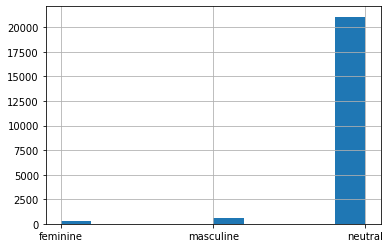

In [41]:
data['gender'].hist()